# Task 3

In [7]:
# Import Important Libraries....
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
# Load the dataset...
dataset=pd.read_csv(r"C:\Users\ALOK BHAGWAT\Downloads\bank+marketing\bank-additional\bank-additional\bank-additional-full.csv", sep=";")

In [9]:
# Display the dataset 
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
# Give index to column first...
dataset.index.name='Id No'
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Id No,,,,,,,,,,,,,,,,,,,,,
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [12]:
# No of rows and columns...
dataset.shape

(41188, 21)

In [13]:
# Information about dataset...
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
# dataset  describe...
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
# Checking null values...
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No Null values in dataset....No need to filling the values...

In [19]:
# Now use label encoding 
le=LabelEncoder()
for col in dataset.select_dtypes(include="object").columns:
    dataset[col] = le.fit_transform(dataset[col])

Label Encoding was applied to transform categorical variables into numeric format for model compatibility...

In [21]:
# looing target variable y by using x 
x=dataset.drop("y",axis=1)
y=dataset["y"]

In [22]:
# Train-Test Split for model learn and evaluation....
x_train, x_test, y_train, y_test = train_test_split(
    x, y , test_size=0.2 , random_state=42
)

80% training, 20% testing is industry standard...

In [35]:
# Build decision tree model...
dtmodel=DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    min_samples_split=50,
    random_state=42
)
dtmodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=42)

criterion="gini" → impurity measure,
max_depth=5 → prevents overfitting,
random_state → reproducibility

In [36]:
# make prediction...
y_pre=dtmodel.predict(x_test)

In [37]:
# Evaluate the model...
accu=accuracy_score(y_test,y_pre)
print("Accuracy:", accu)

Accuracy: 0.9089584850691915


The Decision Tree Classifier demonstrated strong overall performance in predicting customer subscription behavior. The model achieved an accuracy of approximately 90%, indicating that it correctly classified the majority of customer outcomes.


In [38]:
# Classification report...
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7303
           1       0.60      0.59      0.60       935

    accuracy                           0.91      8238
   macro avg       0.77      0.77      0.77      8238
weighted avg       0.91      0.91      0.91      8238



The classification report shows that the model performs very well in identifying customers who did not subscribe to the product, with high precision and recall values. This suggests that the model is effective at correctly filtering non-interested customers.

In [39]:
# confusion matrix...
cm = confusion_matrix(y_test,y_pre)
print(cm)

[[6935  368]
 [ 382  553]]


The confusion matrix further supports this observation, showing a high number of true negatives and true positives, with relatively fewer false predictions. Overall, the results confirm that the decision tree model provides a reliable and interpretable approach for predicting customer purchase decisions and can be effectively used for targeted marketing analysis.

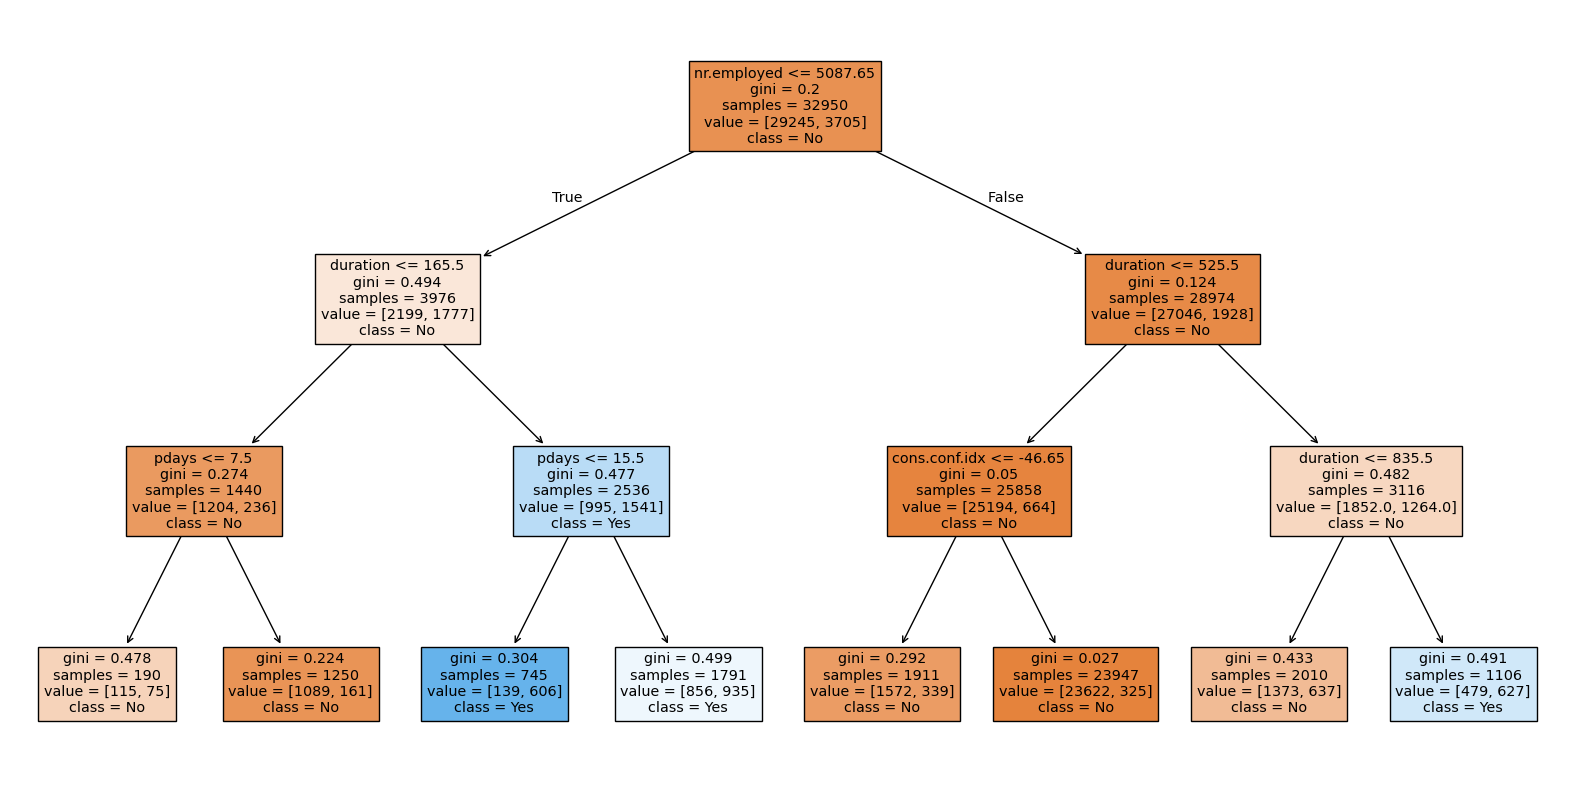

In [40]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(
    dtmodel,
    feature_names=x.columns,
    class_names=["No", "Yes"],
    filled=True
)
plt.show()

The decision tree diagram clearly illustrates how customer purchase decisions are made based on a sequence of important features. The root node indicates that employment variation rate (nr.employed) is the most influential factor in predicting whether a customer will subscribe to a term deposit.
Subsequent splits show that call duration plays a critical role, where longer call durations significantly increase the likelihood of a positive subscription. Additionally, variables such as days since last contact (pdays) and consumer confidence index (cons.conf.idx) further refine the prediction by capturing customer engagement and economic conditions.
The color distribution in the tree highlights that customers with favorable economic indicators and higher engagement levels are more likely to subscribe, while customers with short call durations and unfavorable indicators tend to decline the offer.
Overall, the diagram demonstrates that behavioral factors have a stronger impact than demographic factors in determining customer purchase decisions, making the decision tree a powerful and interpretable model for targeted bank marketing strategies.

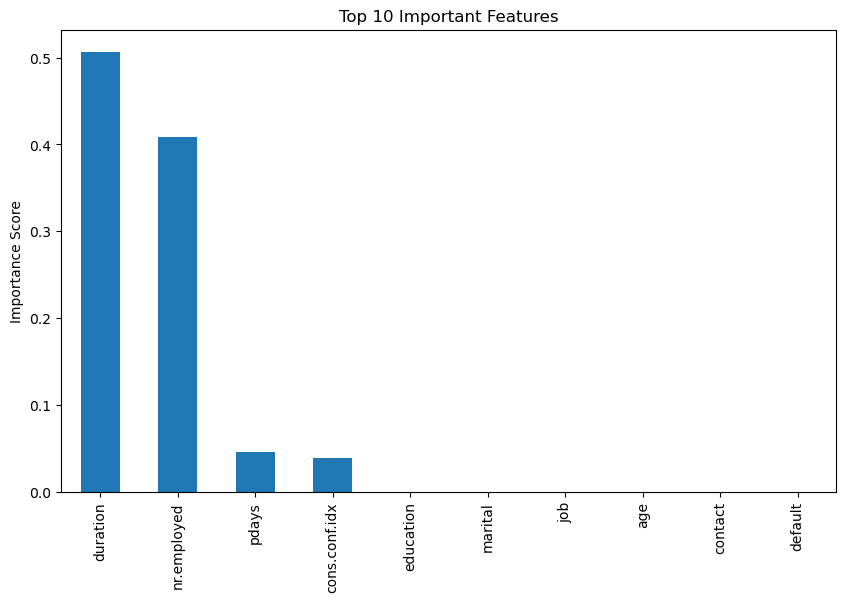

In [41]:
# Feature Importance 
feature_importance = pd.Series(
    dtmodel.feature_importances_,
    index=x.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind="bar")
plt.title("Top 10 Important Features")
plt.ylabel("Importance Score")
plt.show()


The feature importance graph reveals that call duration is the most influential factor in predicting whether a customer will subscribe to a term deposit. This indicates that longer and more engaging conversations significantly increase the likelihood of a successful subscription.
The employment variation rate (nr.employed) is the second most important feature, highlighting the impact of broader economic conditions on customer decision-making. Variables such as days since last contact (pdays) and consumer confidence index (cons.conf.idx) also contribute meaningfully, reflecting the importance of customer engagement history and economic sentiment.
In contrast, demographic features such as age, job, marital status, and education show relatively lower importance, suggesting that behavioral and economic factors play a more critical role than demographic attributes in influencing customer purchase decisions.
Overall, the graph demonstrates that marketing strategies should prioritize customer interaction quality and timing rather than relying solely on demographic segmentation

# Conclusion:

In [43]:
print("""In this task, a Decision Tree Classifier was developed to predict whether a customer would subscribe to a bank term deposit using demographic, behavioral, and economic features from the Bank Marketing dataset. The dataset was carefully preprocessed by encoding categorical variables and splitting the data into training and testing sets.
The trained model achieved strong predictive performance with high accuracy, demonstrating its ability to effectively distinguish between subscribing and non-subscribing customers. Evaluation using a classification report and confusion matrix showed that the model performs particularly well in identifying non-subscribers, while still maintaining
reasonable recall for actual subscribers despite class imbalance.The decision tree visualization provided clear interpretability, revealing that behavioral and economic factors such as call duration, employment variation rate (nr.employed), days since last contact (pdays), and consumer confidence index are the most influential determinants of 
customer decisions. Feature importance analysis further confirmed that these factors have a significantly greater impact than demographic attributes like age, job, or marital status.Overall, this task demonstrates that Decision Tree models are highly effective for marketing analytics due to their transparency and interpretability. The insights 
derived from the model can support data-driven marketing strategies by helping banks focus on high-potential customers, optimize campaign timing, and improve customer engagement, ultimately leading to better conversion rates.""")

In this task, a Decision Tree Classifier was developed to predict whether a customer would subscribe to a bank term deposit using demographic, behavioral, and economic features from the Bank Marketing dataset. The dataset was carefully preprocessed by encoding categorical variables and splitting the data into training and testing sets.
The trained model achieved strong predictive performance with high accuracy, demonstrating its ability to effectively distinguish between subscribing and non-subscribing customers. Evaluation using a classification report and confusion matrix showed that the model performs particularly well in identifying non-subscribers, while still maintaining
reasonable recall for actual subscribers despite class imbalance.The decision tree visualization provided clear interpretability, revealing that behavioral and economic factors such as call duration, employment variation rate (nr.employed), days since last contact (pdays), and consumer confidence index are the mo